<a href="https://colab.research.google.com/github/vishwaayush/C-lab/blob/main/Iris_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [6]:
# Step 2: Load dataset
# Replace 'path_to_your_file.csv' with the actual path of the uploaded CSV file
iris_df = pd.read_csv('/content/IRIS.csv')


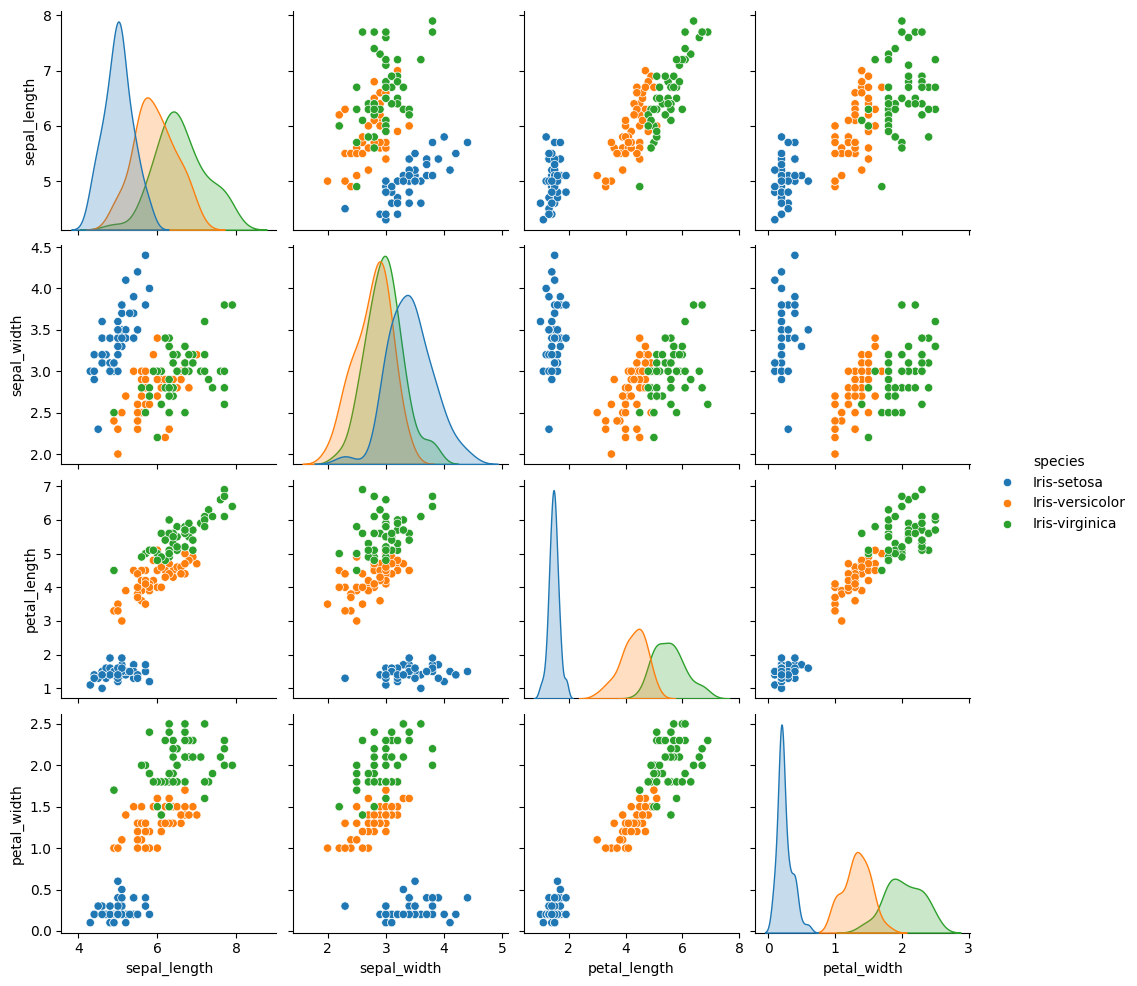

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [7]:
# Step 3: Explore data
sns.pairplot(iris_df, hue='species')
plt.show()

# Check class distribution
print(iris_df['species'].value_counts())


In [8]:
# Step 4: Preprocess
# Split data into features and labels
X = iris_df.drop('species', axis=1)
y = iris_df['species']


In [9]:
# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Step 6: Train model
from sklearn.linear_model import LogisticRegression
import joblib # Import joblib here

# Logistic Regression
model = LogisticRegression(max_iter=200)
# KNN
# model = KNeighborsClassifier(n_neighbors=3)
# Decision Tree
# model = DecisionTreeClassifier()

model.fit(X_train, y_train)

# Save your model after training
joblib.dump(model, 'your_model.pkl')

['your_model.pkl']

In [11]:
# Step 7: Evaluate model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [15]:
# Step 8: Bonus - Build a simple UI using Streamlit
# Uncomment the following lines to run Streamlit in your local environment
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00


In [28]:
import streamlit as st
import joblib
import pandas as pd

# Load the model
try:
    model = joblib.load('your_model.pkl')
except FileNotFoundError:
    st.error("Error: 'your_model.pkl' not found. Please run the model training cell first to create this file.")
    st.stop()

# Streamlit UI
st.title('Iris Flower Classification')

st.write("Enter the measurements of the Iris flower to predict its species.")

# Input fields for the user
sepal_length = st.number_input('Sepal Length (cm)', min_value=0.0, format="%f")
sepal_width = st.number_input('Sepal Width (cm)', min_value=0.0, format="%f")
petal_length = st.number_input('Petal Length (cm)', min_value=0.0, format="%f")
petal_width = st.number_input('Petal Width (cm)', min_value=0.0, format="%f")

# Predict button
if st.button('Predict'):
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

    prediction = model.predict(input_data)

    st.write(f'The predicted species is: **{prediction[0]}**')

2025-08-10 04:18:02.370 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:18:02.372 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:18:02.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:18:02.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:18:02.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:18:02.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:18:02.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:18:02.378 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [23]:
pip show streamlit

Name: streamlit
Version: 1.48.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: 


In [24]:
  import logging
  logging.getLogger('streamlit').setLevel(logging.ERROR)


In [34]:
import streamlit as st
import joblib

# Load the model
model = joblib.load('iris_model.pkl')

# Streamlit UI
st.title('Iris Flower Classification')

# Input fields for the user
sepal_length = st.number_input('Sepal Length (cm)', min_value=0.0)
sepal_width = st.number_input('Sepal Width (cm)', min_value=0.0)
petal_length = st.number_input('Petal Length (cm)', min_value=0.0)
petal_width = st.number_input('Petal Width (cm)', min_value=0.0)

# Predict button
if st.button('Predict'):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = model.predict(input_data)
    st.write(f'The predicted species is: {prediction[0]}')


2025-08-10 04:19:37.685 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:19:37.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:19:37.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:19:37.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:19:37.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:19:37.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:19:37.691 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 04:19:37.692 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [33]:
# Save the Streamlit app code to a Python file
app_code = """
import streamlit as st
import joblib
import pandas as pd

# Load the model
try:
    model = joblib.load('your_model.pkl')
except FileNotFoundError:
    st.error("Error: 'your_model.pkl' not found. Please run the model training cell first to create this file.")
    st.stop()

# Streamlit UI
st.title('Iris Flower Classification')

st.write("Enter the measurements of the Iris flower to predict its species.")

# Input fields for the user
sepal_length = st.number_input('Sepal Length (cm)', min_value=0.0, format="%f")
sepal_width = st.number_input('Sepal Width (cm)', min_value=0.0, format="%f")
petal_length = st.number_input('Petal Length (cm)', min_value=0.0, format="%f")
petal_width = st.number_input('Petal Width (cm)', min_value=0.0, format="%f")

# Predict button
if st.button('Predict'):
    input_data = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

    prediction = model.predict(input_data)

    st.write(f'The predicted species is: **{prediction[0]}**')
"""

with open('app.py', 'w') as f:
    f.write(app_code)

print("Streamlit app code saved to app.py")

Streamlit app code saved to app.py


In [31]:
# Run the Streamlit app
# This will provide a public URL to access your app
!streamlit run app.py &>/dev/null&